<a href="https://colab.research.google.com/github/marceloqs/VLDL_Tarea1/blob/main/Laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

Alumno: Marcelo Quiroga

1.- Implemente las funciones que calculan las siguientes medidas de efectividad. Use los valores de la primera celda para testear.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
relevantes = [2, 3, 5, 8, 13, 21] # ground truth
retornados = [4, 2, 13, 16, 8, 46, 32, 22, 47, 39, 3]

In [3]:
def precision(relevantes, retornados):
  #RESPUESTA
  #return len([x for x in retornados if x in relevantes])/len(retornados)
  #return len(set(relevantes).intersection(set(retornados)))/len(retornados)
  tp = len(set(relevantes) & set(retornados))
  fp = len(retornados) - tp

  return tp / (tp + fp) if tp + fp  > 0 else 0

precision(relevantes, retornados) #=4/11

0.36363636363636365

In [4]:
def recall(relevantes, retornados):
    tp = len(set(relevantes) & set(retornados))
    fn = len(relevantes) - tp

    recall = tp / (tp + fn) if tp + fn > 0 else 0
    return recall

recall(relevantes, retornados)

0.6666666666666666

In [5]:
#indicación, puede llamar a las funciones anteriores
#F1 = 2 / (1/recall + 1/precision)
def f_measure(relevantes, retornados):
  pr = precision(relevantes, retornados)
  rc = recall(relevantes, retornados)
  return 2 / (1/rc + 1/pr)

f_measure(relevantes, retornados)

0.47058823529411764

In [6]:
def precision_at_rank_X(relevantes, retornados, X):
  #RESPUESTA
    r_k = retornados[:X]
    tp = len(set(relevantes) & set(r_k))
    return tp / X if X > 0 else 0

precision_at_rank_X(relevantes, retornados, X=1)

0.0

In [7]:
def reciprocal_rank(relevantes, retornados):
  #RESPUESTA
  for i, elemento in enumerate(retornados, 1):
        if elemento in relevantes:
            return 1 / i
  return 0
reciprocal_rank(relevantes, retornados)

0.5

2.- Implemente las siguientes funciones de distancia. Se le dará un caso de prueba para cada una.

In [8]:
#Jaccard(A, B) = 1 - |A interseccion B|/|A U B|
def jaccard(conjunto1, conjunto2):
  #RESPUESTA
  intrs = len(conjunto1.intersection(conjunto2))
  union = len(conjunto1.union(conjunto2))
  return 1 - (intrs / union)

jaccard(set([1,3,2,7,6,4,8]),set([2,3,4,8,6,5]))

0.375

In [9]:
# l_infinito(x,y) = max(|x_i-y_i|)
def l_infinito(vector1, vector2):
  #RESPUESTA
  diff = [abs(x - y) for x, y in zip(vector1, vector2)]
  return max(diff)
l_infinito(np.array([7,3,8]), np.array([5,6,9]))

3

3.- Dada una imagen en escala de grises, implemente una función que la divida en 2x2 zonas, calcule el histograma de grises en cada zona usando 32 bins y retorne un vector con la concatenación de los 4 histogramas.

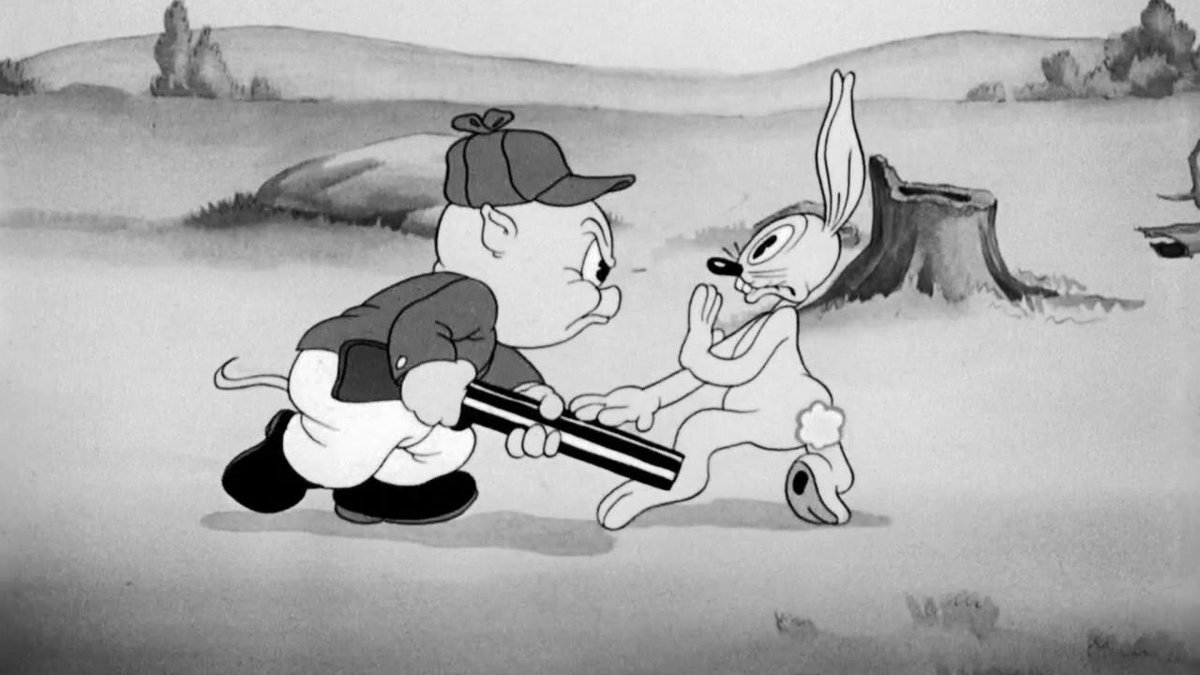

In [10]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/LabRec/bugs.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

In [11]:
#indicación usar np.histogram para calcular los histogramas y np.concatenate con axis=None para concatenar
def hist_gris(img):
  #RESPUESTA
  # Dividir la imagen en zonas de 2x2
  h, w = img.shape
  hh = int(h/2)
  ww = int(w/2)
  z11 = img[:hh, :ww]
  z12 = img[:hh, ww:]
  z21 = img[hh:, :ww]
  z22 = img[hh:, ww:]
  zonas = [z11,z12,z21,z22]
  # Calcular el histograma de grises en cada zona
  histogramas = []
  for zona in zonas:
    histogram, bins = np.histogram(zona, bins=32, density=True)
    histogramas.append(histogram)

  # Concatenar los 4 histogramas en un solo vector
  vector_histogramas = np.concatenate(histogramas, axis=None)

  return vector_histogramas

vc_hist = hist_gris(img)

# Imprimir el vector de histogramas
print("Vector de histogramas:")
print(vc_hist)

Vector de histogramas:
[5.83386668e-05 1.39019802e-04 2.11632823e-04 2.66868370e-04
 3.96578810e-04 5.72836058e-04 5.58561704e-04 5.93316654e-04
 8.68253137e-04 1.21207890e-03 1.35544307e-03 1.93200287e-03
 6.34836407e-03 4.41574058e-03 1.46156979e-03 1.67630573e-03
 2.71585113e-03 4.33133570e-03 5.99709082e-03 7.01863812e-03
 6.63136867e-03 7.04780745e-03 1.12053684e-02 1.14455499e-02
 6.55503190e-03 7.97874362e-03 1.24242742e-02 1.20438316e-02
 7.80434825e-03 8.75080002e-05 9.74379861e-05 3.90993193e-05
 2.92313958e-04 1.68809759e-04 2.55076511e-04 3.20242043e-04
 4.48090611e-04 7.01925874e-04 1.05009600e-03 1.17670332e-03
 1.49446287e-03 1.64837765e-03 1.69492446e-03 1.41129924e-03
 1.58321212e-03 1.52425283e-03 1.54038905e-03 1.56893776e-03
 1.72967941e-03 1.90221291e-03 1.96861969e-03 2.23052307e-03
 3.09629371e-03 5.05560404e-03 6.89699579e-03 1.08615426e-02
 1.80105118e-02 2.52327146e-02 1.09720137e-02 6.14045500e-03
 1.40745137e-02 3.44446384e-04 6.82686527e-05 2.66868370e-05
 